# Jupyter notebook demonstrating the use of additional PmagPy functions

This Jupyter notebook demonstrates a number of PmagPy functions within a notebook environment running a Python 2.7 kernel. The benefits of working within these notebooks include: reproducibility, interactive code development, convenient workspace for projects, version control (when integrated with GitHub or other version control software) and ease of sharing.

### Paleomagnetic Data Analysis Walkthrough
**Basic Functions** 
* [The Dipole Equation](#The-dipole-equation)
* [Get local geomagnetic field estimate from IGRF](#Get-local-geomagnetic-field-estimate-from-IGRF)
* [Plotting Directional Data](#Plotting-Directions)
* [Calculating the Angle Between Two Directions](#Calculate-the-Angle-Between-Directions)
* [Fisher-Distributed Directions](#Generate-and-plot-Fisher-distributed-unit-vectors-from-a-specified-distribution)
* [Flip Directional Data](#Flip-polarity-of-directional-data)

**Data Analysis**
* [Test if Directions Are Fisher-Distributed](#Test-directional-data-for-Fisher-distribution)
* [Simulating Inclination Error in Paleomagnetic Data](#Squish-directional-data)
* [Correcting for Inclination Error in Paleomagnetic Data](#Unsquish-directional-data)
* [Bootstrap Reversal Test](#Bootstrap-Reversal-Test)
* [McFadden and McElhinny (1990) Reversal Test](#MM1990)

**Plotting Paleomagnetic Poles**
* [Working with Poles](#Working-with-Poles)
* [Calculate and Plot VGPs](#Calculate-and-Plot-VGPs)
* [Plotting APWPs](#Plotting-APWPs)


### Rock Magnetism Data Analysis 
* [Working with Anisotropy Data](#Working-with-anisotropy-data)
* [Working with Curie Temperature Data](#Curie-temperature-data)
* [Day Plots](#Day-plots)
* [Hysteresis Loops](#Hysteresis-Loops)
* [Demagnetization Curves](#Demagnetization-Curves)

### Additional Features of the Jupyter Notebook
* [Interactive Plotting](#Interactive-plotting)

*Note: This notebook makes use of pandas for reading, displaying, and using data with a dataframe structure. More information about the pandas module and its use within PmagPy can be found [here](http://earthref.org/PmagPy/cookbook/#x1-1850007.4) within the documentation of the [PmagPy Cookbook](http://earthref.org/PmagPy/cookbook/).*

In [1]:
# With the PmagPy folder in the PYTHONPATH, 
# the function modules from PmagPy can be imported
import pmagpy.ipmag as ipmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.pmag as pmag

from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
#%config InlineBackend.figure_formats = {'svg',}

## The dipole equation

The following demonstrates the use of a simple function (**ipmag.lat_from_inc**) which uses the dipole equation to return expected latitude from inclination data as predicted by a pure geocentric axial dipole. The expected inclination for the geomagnetic field can be calculated from a specified latitude using **ipmag.inc_from_lat**.

In [2]:
inclination = range(0,90,1)
latitude = []
for inc in inclination:
    lat = ipmag.lat_from_inc(inc)
    latitude.append(lat)

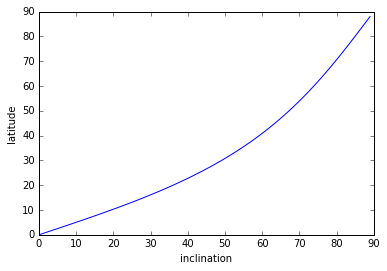

In [3]:
plt.plot(inclination,latitude)
plt.ylabel('latitude')
plt.xlabel('inclination')
plt.show()

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Get local geomagnetic field estimate from IGRF

The function **ipmag.igrf** uses the International Geomagnetic Reference Field (IGRF) model to estimate the geomagnetic field direction at a particular location and time. Let's find the direction of the geomagnetic field in Berkeley, California (37.87&deg; N, 122.27&deg; W, elevation of 52 m) on August 27, 2013 (in decimal format, 2013.6544).

In [4]:
berk_igrf = ipmag.igrf([2013.6544, .052, 37.871667, -122.272778])
ipmag.igrf_print(berk_igrf)

Declination: 13.950
Inclination: 61.354
Intensity: 13.950 nT


[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Plotting Directions

We can plot this direction using **matplotlib** (**plt**) in conjunction with a few **ipmag** functions. To do this, we first initiate a figure (numbered as Fig. 0, with a size of 6x6) with the following syntax:
```python
plt.figure(num=0,figsize=(6,6))
```
We then draw an equal area stereonet within the figure, specifying the figure number:
```python
ipmag.plot_net(0)
```
Now we can plot the direction we just pulled from IGRF using **ipmag.plot_di()**:
```python
ipmag.plot_di(berk_igrf[0],berk_igrf[1])
```
To label or color the plotted points, we would pass the same code as above but with a few extra arguments and one additional line of code:
```python
ipmag.plot_di(berk_igrf[0],berk_igrf[1], color='r', label="Berkeley, CA -- August 27, 2013")
plt.legend()
```
We may wish to save the figure we just created. To do so, we would pass the following *save* function, specifying 1) the relative path to the folder where we want the figure to be saved and 2) the name of the file with the desired extension (.pdf in this example):
```python
plt.savefig("./Additional_Notebook_Output/Berkeley_IGRF.pdf")
```
To ensure the figure is displayed properly and then cleared from the namespace, it is good practice to end such a code block with the following:
```python
plt.show()
```
Now let's run the code we just developed.

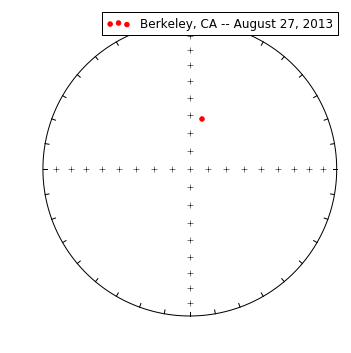

In [5]:
plt.figure(num=0,figsize=(5,5))
ipmag.plot_net(0)
ipmag.plot_di(berk_igrf[0],berk_igrf[1], color='r', label="Berkeley, CA -- August 27, 2013")
plt.legend()
plt.savefig("./Additional_Notebook_Output/Berkeley_IGRF.pdf")
plt.show()

Let's see how this magnetic direction compares to the Geocentric Axial Dipole (GAD) model of the geomagnetic field. We can estimate the expected GAD inclination by passing Berkeley's latitude to the function **ipmag.inc_from_lat**.

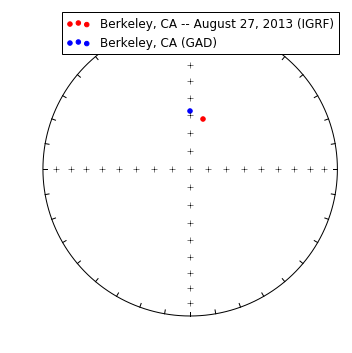

In [6]:
GAD_inc = ipmag.inc_from_lat(37.87)
plt.figure(num=0,figsize=(5,5))
ipmag.plot_net(0)
ipmag.plot_di(berk_igrf[0],berk_igrf[1], color='r', label="Berkeley, CA -- August 27, 2013 (IGRF)")
ipmag.plot_di(0,GAD_inc, color='b', label="Berkeley, CA (GAD)")
plt.legend()
plt.show()

Pretty close! Below, we calculate the angular difference between these two directions. 

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Calculate the Angle Between Directions

While **ipmag** functions have been optimized to preform tasks within an interactive computing environment such as the Jupyter notebook, the **pmag** functions which are used extensively within **ipmag** can also be directly called. Here is a demonstration of the function **pmag.angle**, which calculates the angle between two directions and outputs a **numpy** array. Continuing our comparison from the last section, let's calculate the angle between the IGRF and GAD-estimated magnetic directions calculated and plotted above. 

In [7]:
direction1 = [berk_igrf[0],berk_igrf[1]]
direction2 = [0,GAD_inc]
print pmag.angle(direction1,direction2)[0]

8.18973048085


[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Generate and plot Fisher distributed unit vectors from a specified distribution

Let's use the function **ipmag.fishrot** to generate a set of 50 Fisher-distributed directions at a declination of 200&deg; and inclination of 45&deg;. These directions will serve as an example paleomagnetic dataset that will be used for the next several examples. The output from **ipmag.fishrot** is a nested list of lists of vectors (declination, inclination, intensity). Generally these vectors are unit vectors with an intensity of 1.0. We refer to this data structure as a di_block. In the code below the first two vectors are shown.

In [8]:
fisher_directions = ipmag.fishrot(k=40, n=50, dec=200, inc=50)
fisher_directions[0:2]

[[197.26606546540603, 50.427732203706896, 1.0],
 [212.56898795386991, 51.301437183982522, 1.0]]

This di_block can be unpacked in separate lists of declination and inclination using the **ipmag.unpack_di_block** function.

In [9]:
fisher_decs, fisher_incs = ipmag.unpack_di_block(fisher_directions)
print fisher_decs[0]
print fisher_incs[0]

197.266065465
50.4277322037


Another way to deal with the di_block is to make it into a pandas dataframe which allows for the direction to be nicely displayed and analyzed. In the code below, a dataframe is made from the *fisher_directions* di_block and then the first 5 rows are displayed with .head().

In [10]:
directions = pd.DataFrame(fisher_directions,columns=['dec','inc','length'])
directions.head()

,dec,inc,length
0,197.266065,50.427732,1
1,212.568988,51.301437,1
2,199.841755,35.992486,1
3,205.125300,51.574452,1
4,174.632100,63.638806,1


Now let's calculate the Fisher and Bingham means of these data.

In [11]:
fisher_mean = ipmag.fisher_mean(directions.dec,directions.inc)
bingham_mean = ipmag.bingham_mean(directions.dec,directions.inc)

Here's the raw output of the Fisher mean which is a dictionary containing the mean direction and associated statistics:

In [12]:
fisher_mean

{'alpha95': 2.8661089577515599,
 'csd': 11.412749685747805,
 'dec': 202.17828814883055,
 'inc': 49.720610356399852,
 'k': 50.372030036795145,
 'n': 50,
 'r': 49.027237934143074}

The function **ipmag.print_direction_mean** prints formatted output from this Fisher mean dictionary:

In [13]:
ipmag.print_direction_mean(fisher_mean)

Dec: 202.2  Inc: 49.7
Number of directions in mean (n): 50
Angular radius of 95% confidence (a_95): 2.9
Precision parameter (k) estimate: 50.4


Now we can plot all of our data using the function **ipmag.plot_di**. We can also plot the Fisher mean with its angular radius of 95% confidence ( $\alpha_{95}$ ) using **ipmag.plot_di_mean**.

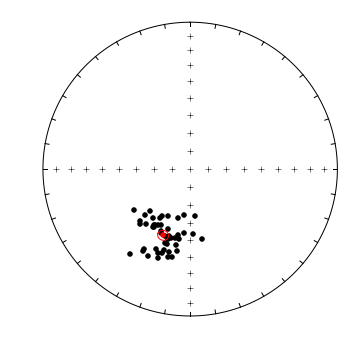

In [14]:
declinations = directions.dec.tolist()
inclinations = directions.inc.tolist()

plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(declinations,inclinations)
ipmag.plot_di_mean(fisher_mean['dec'],fisher_mean['inc'],fisher_mean['alpha95'],color='r')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Flip polarity of directional data

Let's flip all the directions (find their antipodes) of the Fisher-distributed population using the function **ipmag.do_flip()** function and plot the resulting directions.

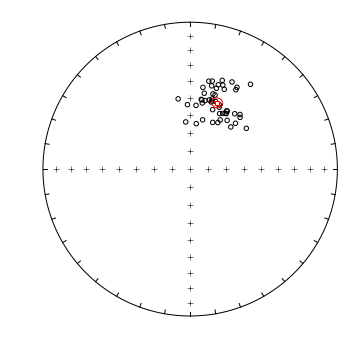

In [15]:
# get reversed directions
dec_reversed,inc_reversed = ipmag.do_flip(declinations,inclinations)

# take the Fisher mean of these reversed directions
rev_mean = ipmag.fisher_mean(dec_reversed,inc_reversed)

# plot the flipped directions
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(dec_reversed, inc_reversed)
ipmag.plot_di_mean(rev_mean['dec'],rev_mean['inc'],rev_mean['alpha95'],color='r',marker='s')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Test directional data for Fisher distribution

The function **ipmag.fishqq** tests whether directional data are Fisher-distributed. Let's use this test on the random Fisher-distributed directions we just created (it should pass!). 

{'Dec': 202.16090957755821,
 'Inc': 49.722823943268637,
 'Me': 0.73090139730847947,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 1.1237950844305897,
 'Mu_critical': 1.207,
 'N': 50,
 'Test_result': 'consistent with Fisherian model'}

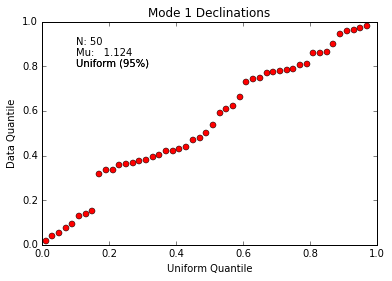

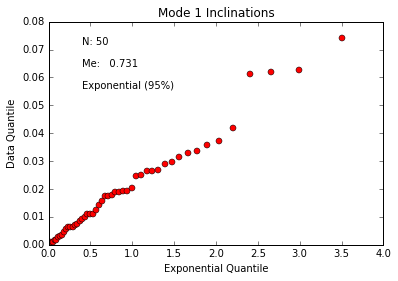

In [16]:
ipmag.fishqq(declinations, inclinations)

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Squish directional data

Inclination flattening can occur for magnetizations in sedimentary rocks. We can simulate inclination error of a specified "flattening factor" with the function **ipmag.squish**. Flattening factors range from 0 (completely flattened) to 1 (no flattening). Let's squish our directions with a 0.4 flattening factor.

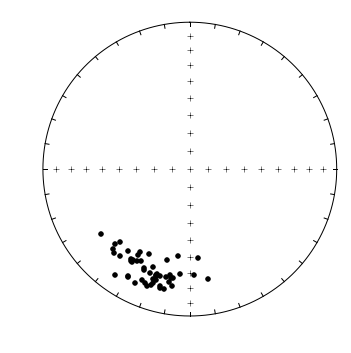

In [17]:
# squish all inclinations
squished_incs = []
for inclination in inclinations:
    squished_incs.append(ipmag.squish(inclination, 0.4))

# plot the squished directional data
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(declinations,squished_incs)
squished_DIs = np.array(zip(declinations,squished_incs))

In [18]:
ipmag.fisher_mean(di_block=squished_DIs)

{'alpha95': 3.3315234837939536,
 'csd': 13.220460674265382,
 'dec': 202.1560084701479,
 'inc': 25.933069423218416,
 'k': 37.538495315043953,
 'n': 50,
 'r': 48.694673305662235}

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Unsquish directional data

We can also "unsquish" data by a specified flattening factor. Let's unsquish the data we squished above with the  function **ipmag.unsquish**. Using a flattening factor of 0.4 will restore the data to its original state.

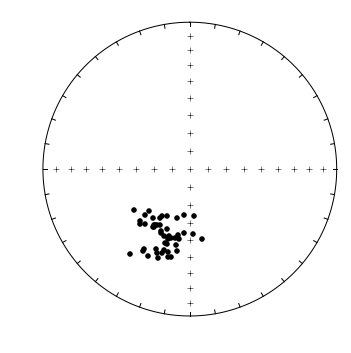

In [19]:
unsquished_incs = []
for squished_inc in squished_incs:
    unsquished_incs.append(ipmag.unsquish(squished_inc, 0.4))

# plot the squished directional data
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(declinations,unsquished_incs)

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Bootstrap Reversal Test

Here we carry out two types of reversal tests with **ipmag** to test if two populations are antipodal to one another: the bootstrap reversal test (Tauxe, 2010; **ipmag.reversal_test_bootstrap**) and the McFadden and McElhinny (1990) reversal test, which is an adaptation of the Watson V test for a common mean (**ipmag.reversal_test_MM1990**). The code below uses **ipmag.fishrot** to simulate normal directions and reversed directions from antipodal Fisher distributions.

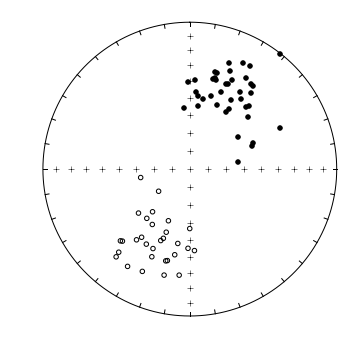

In [20]:
normal_directions = ipmag.fishrot(k=20,n=40,dec=30,inc=45)
reversed_directions = ipmag.fishrot(k=20,n=30,dec=210,inc=-45)
combined_directions = normal_directions + reversed_directions

plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(di_block=combined_directions)

Here are the results of the bootstrap test for a common mean:


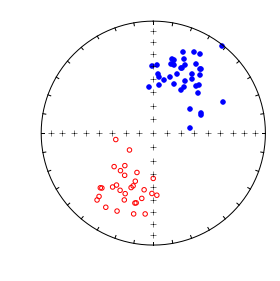

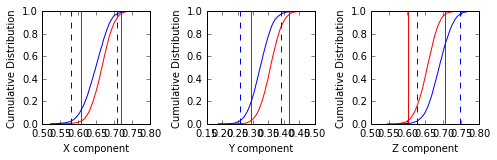

In [21]:
ipmag.reversal_test_bootstrap(di_block=combined_directions, 
                              plot_stereo=True, save=True, 
                              save_folder='./Additional_Notebook_Output/')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

<a id='MM1990'></a>
## McFadden and McElhinny (1990) Reversal Test

Results of Watson V test: 

Watson's V:           0.9
Critical value of V:  6.0
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 2.9
Critical angle for M&M1990:   7.6
The McFadden and McElhinny (1990) classification for
this test is: 'B'


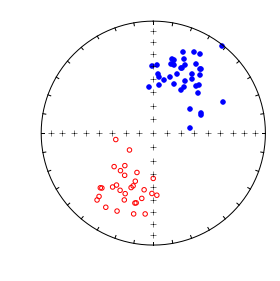

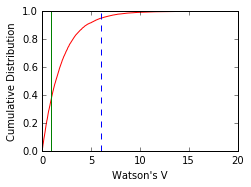

In [22]:
ipmag.reversal_test_MM1990(di_block=combined_directions, 
                           plot_CDF=True, plot_stereo=True, 
                           save=True, save_folder= './Additional_Notebook_Output/')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Working with Poles

A variety of plotting functions within PmagPy, together with the Basemap package of matplotlib, provide a great way to work with paleomagnetic poles, virtual geomagnetic poles, and polar wander paths.

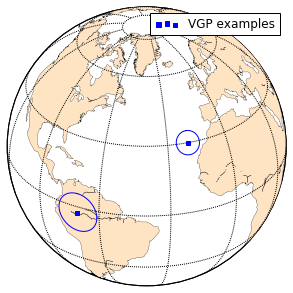

In [23]:
# initiate figure and specify figure size
plt.figure(figsize=(5, 5))

# initiate a Basemap projection, specifying the latitude and
# longitude (lat_0 and lon_0) at which our figure is centered.
pmap = Basemap(projection='ortho',lat_0=30,lon_0=320,
               resolution='c',area_thresh=50000)
# other optional modifications to the globe figure
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))


# Here we plot a pole at 340 E longitude, 30 N latitude with an
# alpha 95 error angle of 5 degrees. Keyword arguments allow us
# to specify the label, shape, and color of this data.
ipmag.plot_pole(pmap,340,30,5,label='VGP examples',
               marker='s',color='Blue')

# We can plot multiple poles sequentially on the same globe using
# the same plot_pole function.
ipmag.plot_pole(pmap,290,-3,9,marker='s',color='Blue')

plt.legend()
# Optional save (uncomment to save the figure)
#plt.savefig('Code_output/VGP_example.pdf')
plt.show()

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Calculate and Plot VGPs

Using the function **ipmag.vgp_calc**, we can calculate virtual geomagnetic poles (VGPs) of our fFisher-distributed directions. We'll need to first assign a location to these magnetic directions - let's assume they are from Berkeley, CA (37.87&deg; N, 122.27&deg; W). 

In [24]:
# plug in site latitude and longitude to the "directions" dataframe
directions['site_lat'] = 37.97
directions['site_lon'] = -122.27

# calculate VGPs (this automatically adds VGP data to the dataframe)
ipmag.vgp_calc(directions, dec_tc = 'dec', inc_tc = 'inc')
directions.head()

,dec,inc,length,site_lat,site_lon,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
0,197.266065,50.427732,1,37.97,-122.27,31.173609,-19.003851,222.149623,19.003851,42.149623
1,212.568988,51.301437,1,37.97,-122.27,31.969693,-13.759186,209.685361,13.759186,29.685361
2,199.841755,35.992486,1,37.97,-122.27,19.959558,-29.141764,216.305629,29.141764,36.305629
3,205.125300,51.574452,1,37.97,-122.27,32.221816,-16.007852,215.786177,16.007852,35.786177
4,174.632100,63.638806,1,37.97,-122.27,45.255502,-6.634098,241.531413,6.634098,61.531413


We have already calculated the Fisher mean of this data, so let's translate it to a VGP too. For a one-line dataset, we plug the Fisher mean data into a **pandas** *Series* instead of a *DataFrame* (a *DataFrame* can be considered a sequence of concatenated *Series*).

In [25]:
mean_pole = pd.Series(fisher_mean)
mean_pole['site_lat'] = 37.97
mean_pole['site_lon'] = -122.27
ipmag.vgp_calc(mean_pole, dec_tc = 'dec', inc_tc = 'inc')
mean_pole

alpha95               2.866109
csd                   11.41275
dec                   202.1783
inc                   49.72061
k                     50.37203
n                           50
r                     49.02724
site_lat                 37.97
site_lon               -122.27
paleolatitude         30.54102
vgp_lat              -18.42652
vgp_lon          217.689227334
vgp_lat_rev           18.42652
vgp_lon_rev           37.68923
dtype: object

Plong: 202.2  Plat: 49.7
Number of directions in mean (n): 50.0
Angular radius of 95% confidence (A_95): 2.9
Precision parameter (k) estimate: 50.4


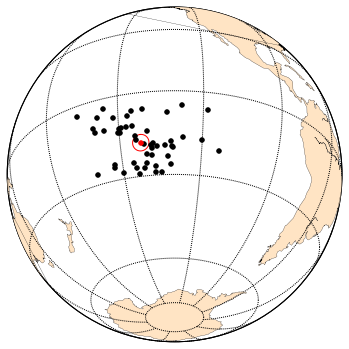

In [26]:
plt.figure(figsize=(6, 6))
pmap = Basemap(projection='ortho',lat_0=-30,lon_0=-130,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

# use the print_pole_mean function to print the mean data above the globe
ipmag.print_pole_mean(mean_pole)
for n in range(len(directions)):
    ipmag.plot_vgp(pmap, directions['vgp_lon'][n], 
                   directions['vgp_lat'][n])
ipmag.plot_pole(pmap, mean_pole['vgp_lon'], mean_pole['vgp_lat'], 
                mean_pole['alpha95'], color='r')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Plotting APWPs

The capability to plot multiple poles in sequence provides a good way to visualize polar wander paths. Here we use the Phanerozoic APWP of Laurentia *(Torsvik, 2012)* to demonstrate the plot_pole_colorbar function.

We first upload the Torsvik (2012) data using the pandas function *read_csv*. 

In [27]:
Laurentia_Pole_Compilation = pd.read_csv('./Additional_Data/Torsvik2012/Laurentia_Pole_Compilation.csv')
Laurentia_Pole_Compilation.head()

,Q,A95,Com,Formation,Lat,Lon,CLat,CLon,RLat,RLon,EULER,Age,GPDB RefNo/Reference
0,5,3.9,NaN,Dunkard Formation,-44.1,301.5,-41.5,300.4,-38.0,43.0,(63.2/_ 13.9/79.9),300,"302, T"
1,5,2.1,NaN,Laborcita Formation,-42.1,312.1,-43.0,313.4,-32.7,52.9,(63.2/_ 13.9/79.9),301,"1311, T"
2,5,3.4,#,Wescogame Formation,-44.1,303.9,-46.3,306.8,-38.2,51.4,(63.2/_ 13.9/79.9),301,"1311, T"
3,6,3.1,I,Glenshaw Formation,-28.6,299.9,-28.6,299.9,-28.6,32.4,(63.2/_ 13.9/79.9),303,Kodama (2009)
4,5,1.8,NaN,Lower Casper Formation,-45.7,308.6,-50.5,314.6,-37.6,59.8,(63.2/_ 13.9/79.9),303,"1455, T"


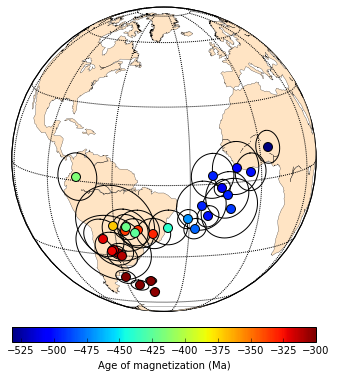

In [28]:
# initiate the figure as in the plot_pole example
plt.figure(figsize=(6, 6))
pmap = Basemap(projection='ortho',lat_0=10,lon_0=320,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

# Loop through the uploaded data and use the plot_pole_colorbar function
# (instead of plot_pole) to plot the individual poles. The input of this
# function is very similar to that of plot_pole but has the additional
# arguments of (1)AGE, (2)MINIMUM AND (3)MAXIMUM AGES OF PLOTTED POLES.
# Note that the ages are treated as negative numbers -- this just determines
# the direction of the colorbar.
for n in xrange (0, len(Laurentia_Pole_Compilation)):
     m = ipmag.plot_pole_colorbar(pmap, Laurentia_Pole_Compilation['CLon'][n],
                                  Laurentia_Pole_Compilation['CLat'][n],
                                  Laurentia_Pole_Compilation['A95'][n],
                                  -Laurentia_Pole_Compilation['Age'][n],
                                  -532,
                                  -300,
                                  markersize=80, color="k", alpha=1)

pmap.colorbar(m,location='bottom',pad="5%",label='Age of magnetization (Ma)')

# Optional save (uncomment to save the figure)
#plt.savefig('Additional_Notebook_Output/plot_pole_colorbar_example.pdf')

plt.show()

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Working with anisotropy data

The following code demonstrates reading magnetic anisotropy data into a pandas DataFrame.

In [29]:
aniso_data = pd.read_csv('./Additional_Data/ani_depthplot/rmag_anisotropy.txt',
                         delimiter='\t',skiprows=1)
aniso_data.head()

,anisotropy_n,anisotropy_s1,anisotropy_s2,anisotropy_s3,anisotropy_s4,anisotropy_s5,anisotropy_s6,anisotropy_sigma,anisotropy_tilt_correction,anisotropy_type,anisotropy_unit,er_analyst_mail_names,er_citation_names,er_location_name,er_sample_name,er_site_name,er_specimen_name,magic_method_codes
0,192,0.332294,0.332862,0.334844,-0.000048,0.000027,-0.000263,0.000122,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-2-W-35,318-U1361A-001H-2-W-35,318-U1361A-001H-2-W-35,LP-X:AE-H:LP-AN-MS:SO-V
1,192,0.333086,0.332999,0.333916,-0.000262,-0.000322,0.000440,0.000259,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-3-W-90,318-U1361A-001H-3-W-90,318-U1361A-001H-3-W-90,LP-X:AE-H:LP-AN-MS:SO-V
2,192,0.333750,0.332208,0.334041,-0.000699,0.000663,0.002888,0.000093,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-4-W-50,318-U1361A-001H-4-W-50,318-U1361A-001H-4-W-50,LP-X:AE-H:LP-AN-MS:SO-V
3,192,0.330565,0.333928,0.335507,0.000603,0.000212,-0.000932,0.000198,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-5-W-59,318-U1361A-001H-5-W-59,318-U1361A-001H-5-W-59,LP-X:AE-H:LP-AN-MS:SO-V
4,192,0.332747,0.332939,0.334314,-0.001516,-0.000311,-0.000099,0.000162,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-6-W-60,318-U1361A-001H-6-W-60,318-U1361A-001H-6-W-60,LP-X:AE-H:LP-AN-MS:SO-V


The function **ipmag.aniso_depthplot** is one example of how PmagPy works with such data to generate plots. 

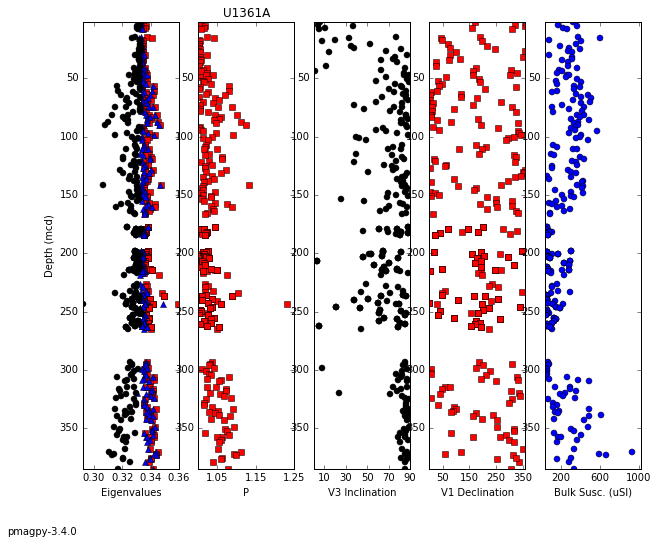

In [30]:
ipmag.aniso_depthplot(dir_path='./Additional_Data/ani_depthplot/');

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Curie temperature data

second deriative maximum is at T=205


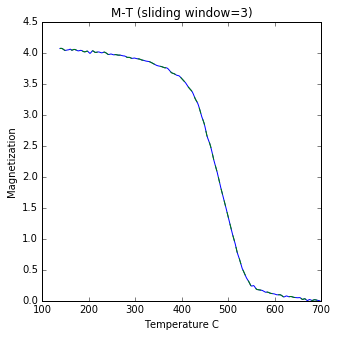

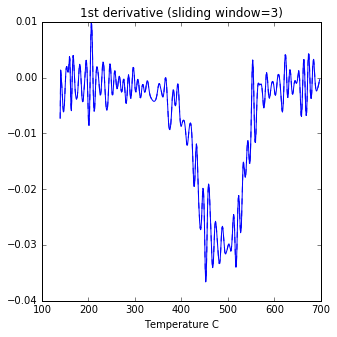

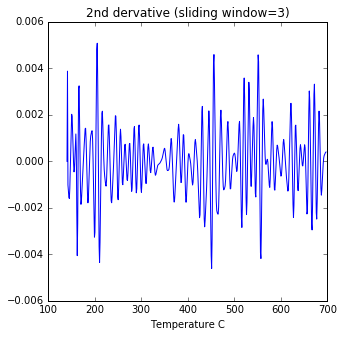

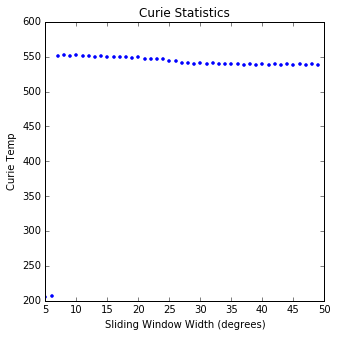

In [31]:
ipmag.curie(path_to_file='./Additional_Data/curie/',
            file_name='curie_example.dat', save=True, 
            save_folder='Additional_Notebook_Output/curie/')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Day plots

Here we demonstrate the function **ipmag.dayplot**, which creates Day plots, squareness/coercivity and squareness/coercivity of remanence diagrams using hysteresis data.

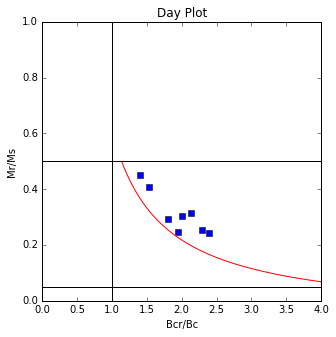

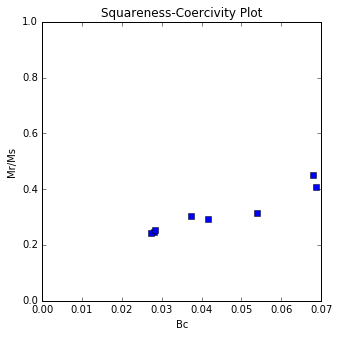

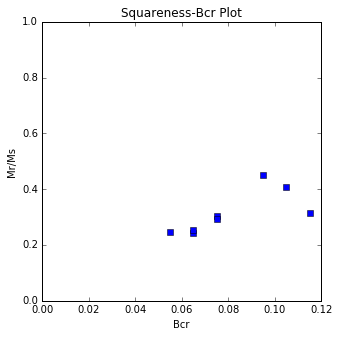

In [32]:
ipmag.dayplot(path_to_file='./Additional_Data/dayplot_magic/', 
              hyst_file='dayplot_magic_example.dat',
              save=True,save_folder='Additional_Notebook_Output/day_plots/');

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Hysteresis Loops

The function **ipmag.hysteresis_magic** also generates a set of hysteresis plots with data from a *magic_measurements* file.

IS06a-1 1 out of  8


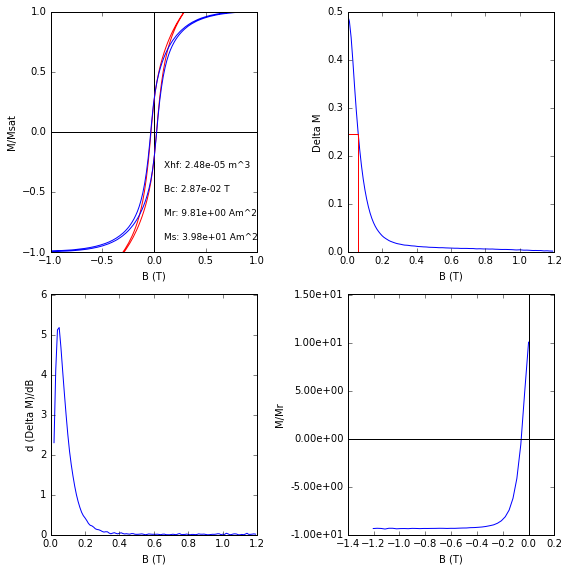

IS06a-2 2 out of  8


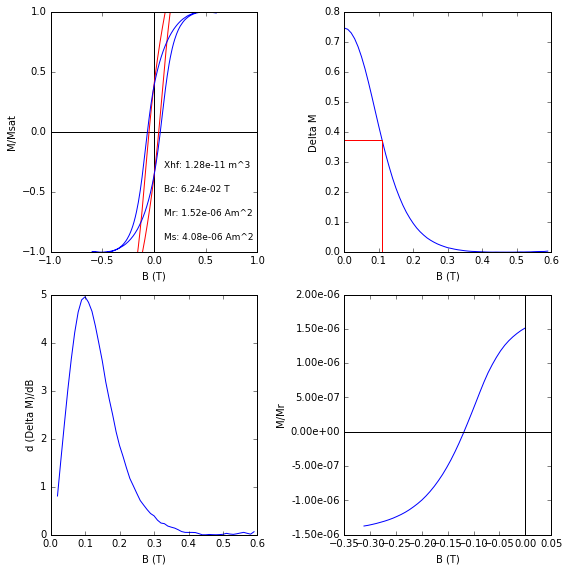

IS06a-3 3 out of  8


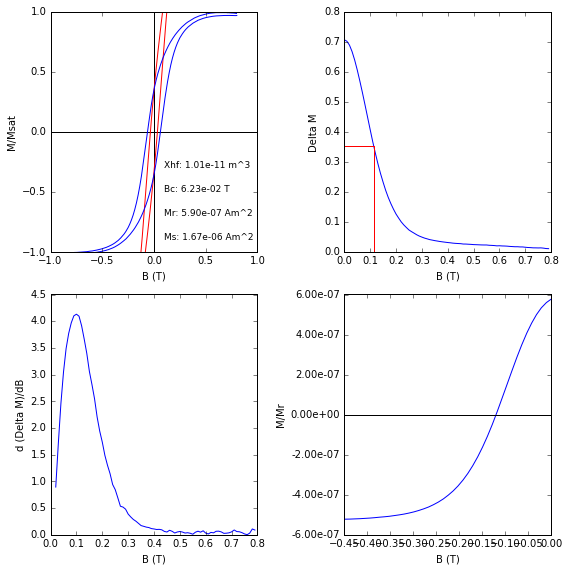

IS06a-4 4 out of  8


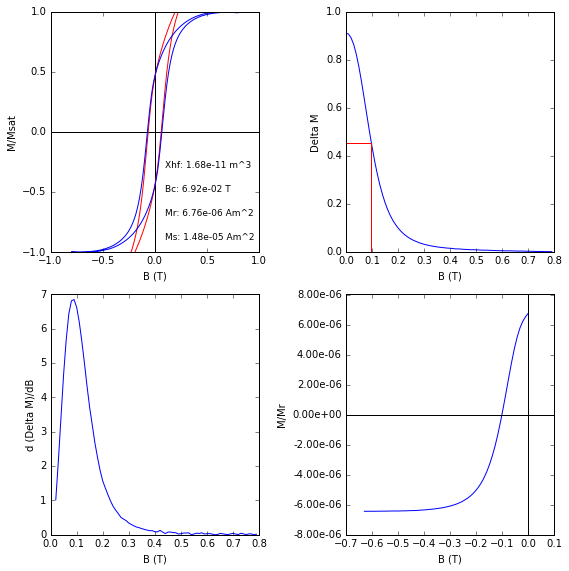

IS06a-5 5 out of  8


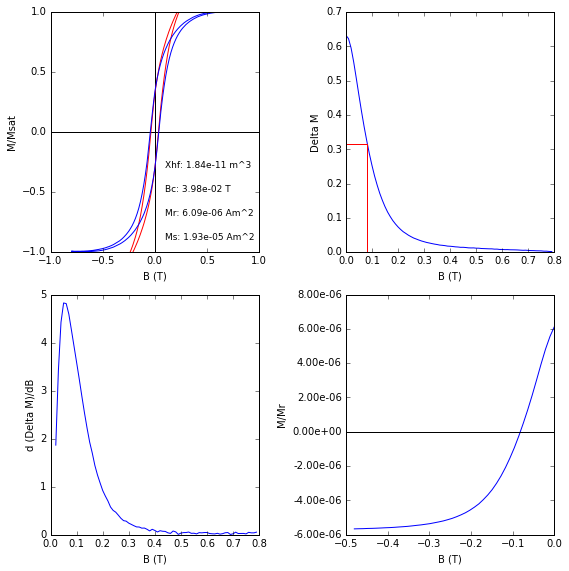

IS06a-6 6 out of  8


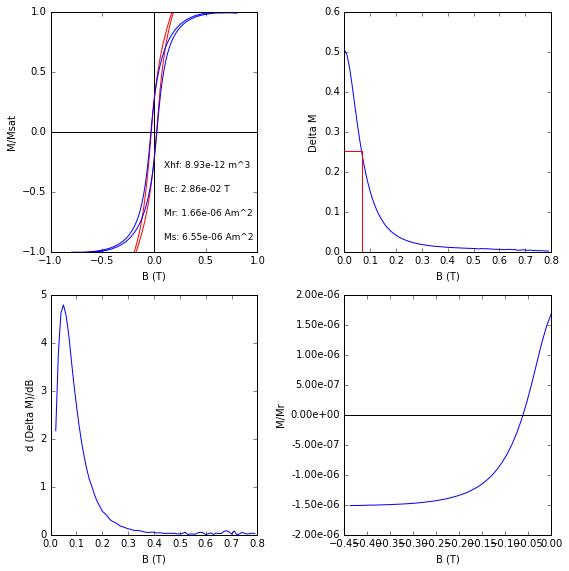

IS06a-8 7 out of  8


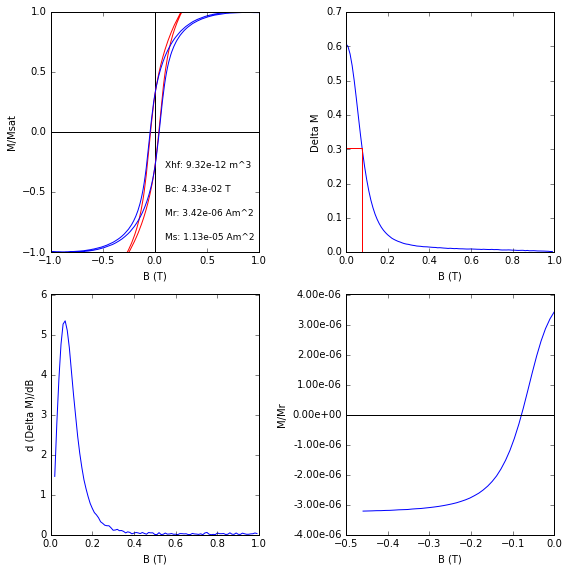

IS06a-9 8 out of  8


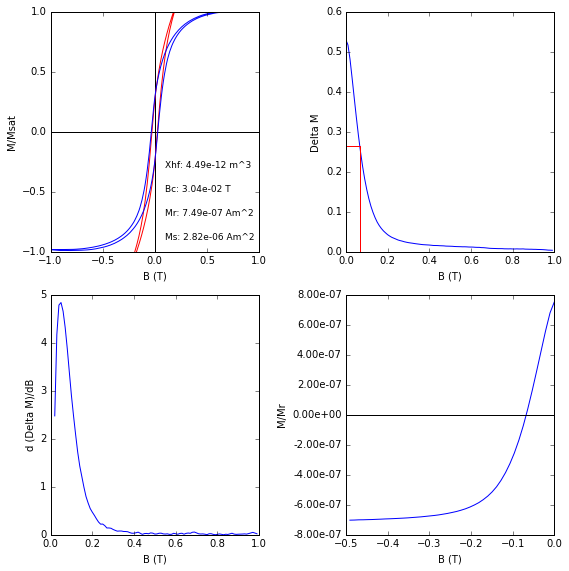

In [33]:
ipmag.hysteresis_magic(path_to_file='./Additional_Data/hysteresis_magic/',
                 hyst_file='hysteresis_magic_example.dat', save=True,
                save_folder='./Additional_Notebook_Output/hysteresis')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Demagnetization Curves

The function **ipmag.demag_magic** filters and plots demagnetization data. These data will be read and combined by expedition, location, site or sample according to the *plot_by* keyword argument. Alternatively, you can choose to plot each specimen measurement individually. By default, all plots generated by this function will be shown. If you only wish to plot a single subset of data, you can use the keyword argument *individual* to specify the name of the one site, location, sample, etc. that you would like to see. 

Below, we use the *magic_measurements.txt* file of Swanson-Hysell et al., 2014 to plot demagnetization data by site. We then specify an individual site ('SI1(58.1 to 64.1)') that will plot alone. Like other functions, these plots can be optionally saved out of the notebook.

13648  records read from  ./Example_Data/Swanson-Hysell2014/magic_measurements.txt
SI1(58.1 to 64.1) plotting by:  er_site_name


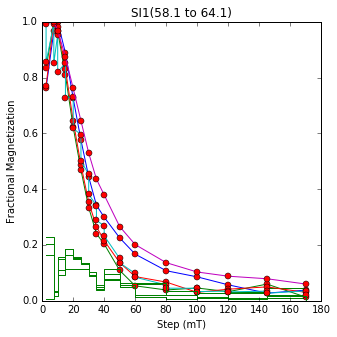

In [34]:
ipmag.demag_magic(path_to_file='./Example_Data/Swanson-Hysell2014/', 
                 plot_by='site', treat='AF', individual= 'SI1(58.1 to 64.1)')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Interactive plotting

IPy Widgets are part of what makes the Jupyter notebook environment so powerful -- these widgets allow user interaction with figures. We first demonstrate the use of the **interact** widget, imported below.

*Note: If you do not have the ipywidgets package installed, you may choose to either install it through Anaconda or Enthought (depending on your Python distribution), manually install it (a bit more difficult), or simply skip the next few blocks of code. Below are quick installation instructions for those with either an Anaconda or Enthought Canopy distribution.*

***Installation on Anaconda***

On the command line, enter
```bash
conda install ipywidgets
```
Make sure this installs within the Python 2 environment (if you have Python 3 as your default environment).

***Installation on Enthought Canopy***

Open the Canopy application and navigate to the Package Manager. Search for and install ipywidgets.

In [35]:
from ipywidgets import interact

The **interact** widget allows adjustable values (within specified bounds) to all keyword arguments of a function. It can be used as a wrapper function, as seen below. Here we create a new function, **squish_interactive**, which streamlines the **ipmag.squish** function and automatically inputs the fisher-distributed directions created at the beginning of the notebook. This new function also allows us to reduce the keyword arguments to the *factor* variable, which is the only value we want to be actively adjustable. Finally, to make the **squish_interactive** function interactive in the notebook, we "wrap" this function with **@interact** placed directly above our new function.

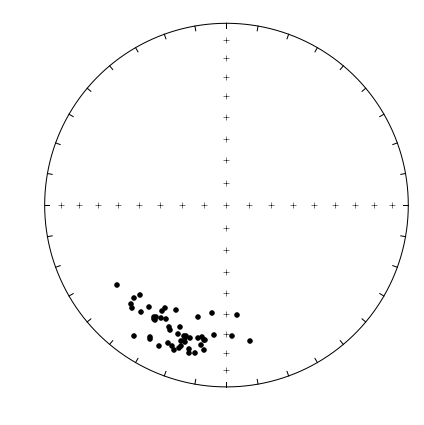

In [36]:
@interact
def squish_interactive(flattening_factor=(0.,1.,.1)):
    squished_incs = []
    for inclination in inclinations:
        squished_incs.append(ipmag.squish(inclination, flattening_factor))

    # plot the squished directional data
    plt.figure(num=1,figsize=(6,6))
    ipmag.plot_net(1)
    ipmag.plot_di(declinations,squished_incs)

**interact** can also be used as a regular function call -- the name of the interactive function is passed as the first argument, followed by the adjustable keyword arguments. Below, we demonstrate passing the *curie* function's parameters to **interact**. 

second deriative maximum is at T=205


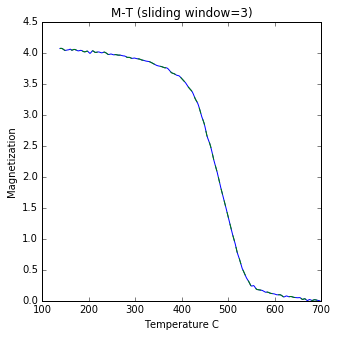

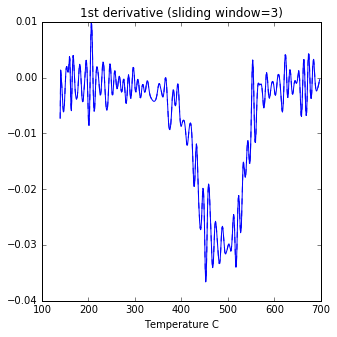

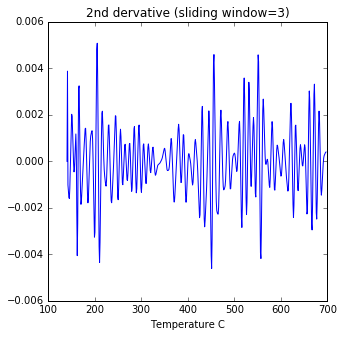

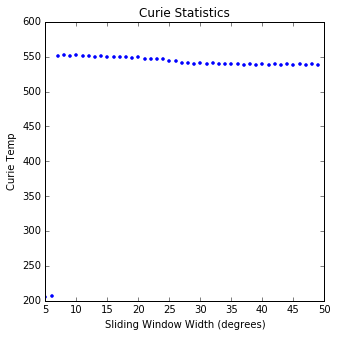

In [37]:
interact(ipmag.curie, path_to_file='./Additional_Data/curie/',file_name='curie_example.dat',window_length = (1,60));

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)